# 📊 S&P 500 Companies: Financial Performance Analysis

### **Project Title:**  
**Exploring Sector-Level Financial Trends in the S&P 500 using Bootstrapping & Statistical Inference**

**Dataset Source:**  [Kaggle – S&P 500 Companies with Financial Information](https://www.kaggle.com/datasets/paytonfisher/sp-500-companies-with-financial-information/data)

**Author:**  Kavya Khanna

**Course:**  SEIS 631 – Data Preparation & Analysis (Fall 2025)

**Goal:**  Use real-world financial data to assess and compare key sector metrics, with uncertainty estimation using bootstrapping.

**Background:** S&P 500 stands for the Standard & Poor’s 500 Index.
It is a stock market index that tracks the performance of 500 large, publicly traded companies listed on U.S. stock exchanges.
These companies span 11 sectors, including technology, healthcare, energy, financials, etc.
It is one of the most widely used benchmarks for the overall performance of the U.S. stock market and economy.
**Key Financial Metrics Explained:**
EBITDA → profitability

Earnings/Share → per-share profit

Price/Earnings → valuation

Dividend Yield → investor return

Market Cap → company size

## **Clean the Dataset**

In [1]:
#Import the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df=pd.read_csv('C:\\Users\\Kavya\\OneDrive - University of St. Thomas\\Desktop\\SEISS-631-02\\assignment-clt-kavyakhanna-1\\financials.csv')
pd.options.display.float_format = '{:,.2f}'.format
df.drop(columns=['Price/Book'], inplace=True)
df['Price/Earnings'].fillna(df['Price/Earnings'].median())
df.duplicated().sum() #no duplicates 
df.select_dtypes(include='object').columns #check all object data type columns


Index(['Symbol', 'Name', 'Sector', 'SEC Filings'], dtype='object')

In [2]:
df.head(10)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.33,7.92,259.77,175.49,"138,721,055,226.00","9,048,000,000.00",4.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.15,1.70,68.39,48.92,"10,783,419,933.00","601,000,000.00",3.58,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.91,0.26,64.60,42.28,"102,121,042,306.00","5,744,000,000.00",3.74,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.50,3.29,125.86,60.05,"181,386,347,059.00","10,310,000,000.00",6.29,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.71,5.44,162.60,114.82,"98,765,855,553.00","5,643,228,000.00",2.60,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.43,1.28,74.94,38.93,"52,518,668,144.00","2,704,000,000.00",10.60,http://www.sec.gov/cgi-bin/browse-edgar?action...
6,AYI,Acuity Brands Inc,Industrials,145.41,18.22,0.35,7.43,225.36,142.00,"6,242,377,704.00","587,800,000.00",1.80,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.00,3.39,204.45,114.45,"94,550,214,268.00","2,538,040,000.00",13.09,http://www.sec.gov/cgi-bin/browse-edgar?action...
8,AAP,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.22,6.19,169.55,78.81,"8,123,611,867.00","853,941,000.00",1.13,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.00,0.03,15.65,9.70,"11,191,663,795.00","339,000,000.00",2.11,http://www.sec.gov/cgi-bin/browse-edgar?action...


## **Which sectors typically profit more ?**

In [3]:
#sector wise profit using median 
sector_profit = df.groupby('Sector')['EBITDA'].agg(['median']).round(2)
sector_profit = sector_profit.sort_values(by='median', ascending=False)

sector_profit


,median
Sector,
Telecommunication Services,"45,745,000,000.00"
Consumer Staples,"3,011,012,500.00"
Utilities,"2,895,500,000.00"
Energy,"2,407,000,000.00"
Materials,"2,152,000,000.00"
Consumer Discretionary,"1,962,093,500.00"
Health Care,"1,676,204,000.00"
Information Technology,"1,667,542,000.00"
Industrials,"1,635,916,000.00"


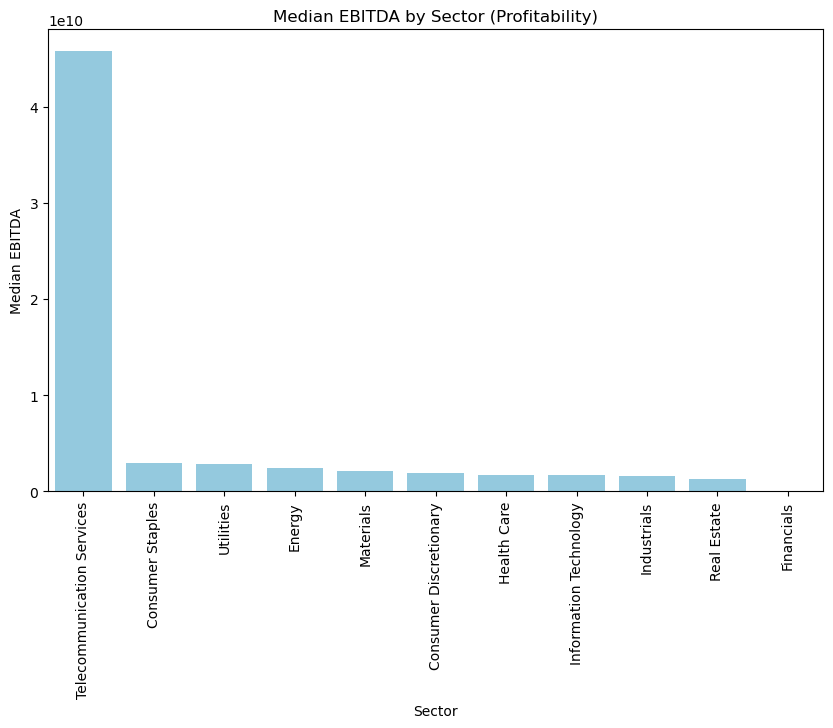

In [4]:

plt.figure(figsize=(10,6))
sns.barplot(x=sector_profit.index, y=sector_profit['median'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Median EBITDA by Sector (Profitability)')
plt.ylabel('Median EBITDA')
plt.show()

The bar chart illustrates the median EBITDA across various sectors in S&P 500 Companies. The technology sector shows the highest profit as compared to the other sectors. However, Financial is the only sector with no profitability indicating loss in that sector. 

### **Permutation test: Telecommunication Vs Non-Telecommunication EBITDA**

**Null Hypothesis:** There is no difference in EBITDA mean for telecommunication companies and mean EBITDA for companies in all sectors.
**Alternative Hypothesis:** There is a difference in EBITDA mean for telecommunication companies and mean EBITDA for companies in all sectors.

The difference in means between telecommunication sector and all other sector is: 30247694477.1


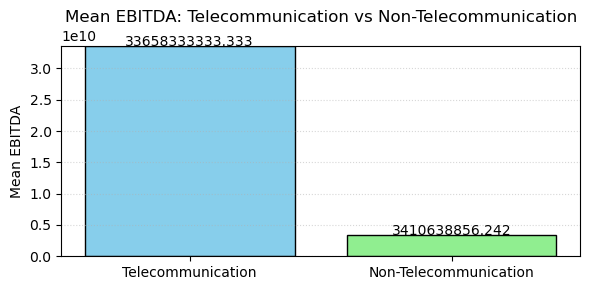

In [5]:
#Saperate the telecommunication and all other sectors
telecom_df_permu=df[df['Sector']=='Telecommunication Services']['EBITDA'].dropna().values
all_sector_df_permu=df[df['Sector']!='Telecommunication Services']['EBITDA'].dropna().values

observed_diff_perm=np.mean(telecom_df_permu)- np.mean(all_sector_df_permu)
print(f'The difference in means between telecommunication sector and all other sector is: {observed_diff_perm.round(1)}')


plt.figure(figsize=(6,3))
groups = ['Telecommunication', 'Non-Telecommunication']
proportions = [np.mean(telecom_df_permu), np.mean(all_sector_df_permu)]
plt.bar(groups, proportions, color=['skyblue', 'lightgreen'], edgecolor='black')
plt.ylabel('Mean EBITDA')
plt.title('Mean EBITDA: Telecommunication vs Non-Telecommunication')
#Add values on top of bars
for i, v in enumerate(proportions):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=10)
# y-axis limit for space
plt.ylim(0, max(proportions) + 0.1)
# Grid for readability
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


## **Permutation Test: Do Telecommunication companies profit more than other sectors combined ?**

In [6]:
#Permutation test
combined=np.concatenate((telecom_df_permu,all_sector_df_permu))
num_permutations=10000
diff=[]
for _ in range(num_permutations):
    np.random.shuffle(combined)
    new_telecom=combined[:len(telecom_df_permu)]
    new_non_telecom=combined[len(telecom_df_permu):]
    diff.append(new_telecom.mean()- new_non_telecom.mean())

#calculate p-value
mean_difference=np.array(diff)
p_value=np.mean(mean_difference>=observed_diff_perm)
print("The p-value from the permutation test is:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: Telecommunication companies profit more than other sectors combined.")
else:
    print("Fail to reject the null hypothesis: No significant difference in profit between telecommunication companies and other sectors combined.")

The p-value from the permutation test is: 0.0008
Reject the null hypothesis: Telecommunication companies profit more than other sectors combined.


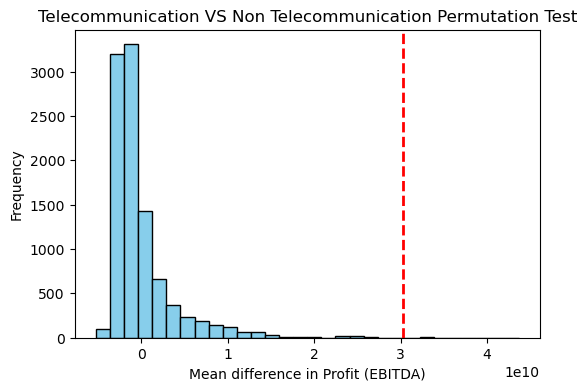

In [7]:
#plotting
plt.figure(figsize=(6,4))
plt.hist(mean_difference, bins=30, color='skyblue',edgecolor='black')
plt.axvline(observed_diff_perm, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Mean difference in Profit (EBITDA)')
plt.ylabel('Frequency')
plt.title('Telecommunication VS Non Telecommunication Permutation Test')
plt.show()

### **Bootstrapping: Telecommunication Vs Non-Telecommunication EBITDA**

95% confidence interval lies between : 2309564370.3768215, 46107144174.23621


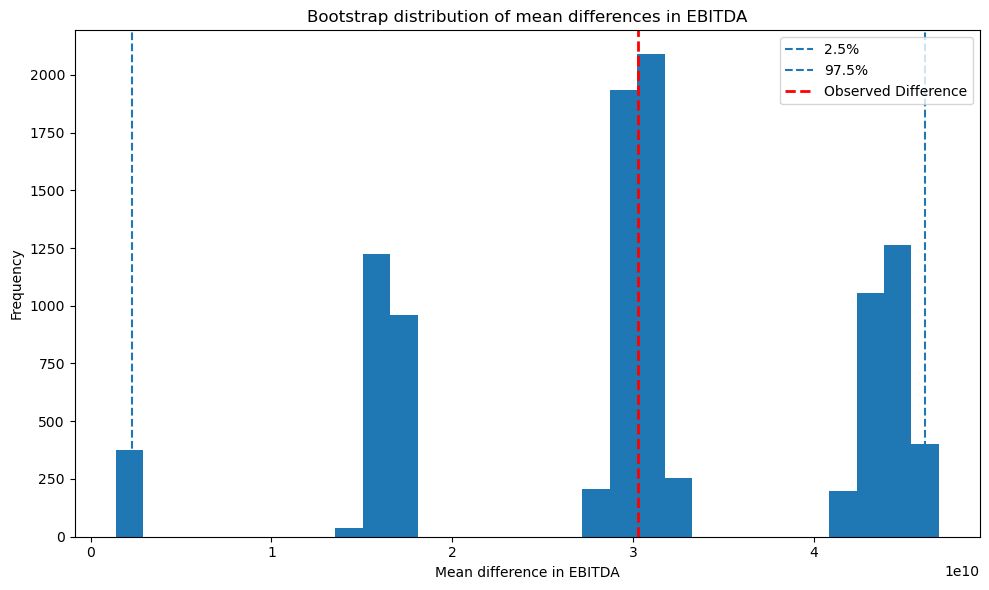

In [8]:
#Saperate the telecommunication and all other sectors
telecom_df=df[df['Sector']=='Telecommunication Services'].copy()
all_sector_df=df[df['Sector']!='Telecommunication Services'].copy()

#extract the EBITDA values for both groups 
telecom_df_ebitda=telecom_df['EBITDA'].dropna().values
all_sector_df_ebitda=all_sector_df['EBITDA'].dropna().values

#calculate observed difference in means
observed_diff=np.mean(telecom_df_ebitda)- np.mean(all_sector_df_ebitda)
observed_diff

#Bootstrap: Resample with replacement to estimate the sampling distribution 
num=10000
boot_mean_diff=[]

for i in range(num):
    boot_telecom=np.random.choice(telecom_df_ebitda,size=len(telecom_df_ebitda),replace=True)
    boot_others=np.random.choice(all_sector_df_ebitda,size=len(all_sector_df_ebitda),replace=True)
    boot_mean_diff.append(np.mean(boot_telecom)- np.mean(boot_others))

lower=np.percentile(boot_mean_diff,2.5)
upper=np.percentile(boot_mean_diff,97.5)
print(f'95% confidence interval lies between : {lower}, {upper}')

#visualize the boootstrap distribution
plt.figure(figsize=(10,6))
plt.hist(boot_mean_diff, bins=30)                 # bootstrap CI distribution
plt.axvline(lower, linestyle='--',label='2.5%')               # 2.5%
plt.axvline(upper, linestyle='--',label='97.5%')               # 97.5%
plt.axvline(observed_diff,color='red',linestyle='dashed',linewidth=2,label='Observed Difference')
plt.title('Bootstrap distribution of mean differences in EBITDA')
plt.xlabel('Mean difference in EBITDA')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

**IDEAS : Do High profit sector companies provide more dividends to their shareholders?**
**Do only larger companies(more market cap) earn more profit in tech sectors?** 

In [9]:
#find the highest market cap company in tech sector 
tech_companies=df[df['Sector']=='Telecommunication Services']
tech_companies=df[df['Sector']=='Telecommunication Services'].sort_values(by='Market Cap', ascending=False).head(10)

tech_companies

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,SEC Filings
58,T,AT&T Inc,Telecommunication Services,35.57,12.14,5.42,4.76,42.70,32.55,"226,713,270,000.00","49,653,000,000.00",1.41,http://www.sec.gov/cgi-bin/browse-edgar?action...
474,VZ,Verizon Communications,Telecommunication Services,49.04,13.08,4.63,7.36,54.77,42.80,"208,092,277,044.00","45,745,000,000.00",1.65,http://www.sec.gov/cgi-bin/browse-edgar?action...
99,CTL,CenturyLink Inc,Telecommunication Services,16.20,8.35,12.66,1.16,27.61,13.16,"18,237,196,861.00","5,577,000,000.00",1.48,http://www.sec.gov/cgi-bin/browse-edgar?action...


## **Reflection**

I have analyzed the financial performance of S&P 500 companies across different sectors using EBITDA as  profitability metric. 
1. cleaned the dataset. 
2. find which sector has highest profit using median EBITDA 
3. choose that sector and compared it to other sectors ( telecommunication vs non-telecommunication) and performed permutation test
4.performed bootstraping to estimate the confidence interval for mean difference in profitability between telecom and non telecom.

Doubts: 
1. I think i perfomed the permutation test well, but when i cmae to bootstrapping part, i messed up becasue the interval values are very large which is not making sense to me as well as the graph looks weired. I would like to know where i went wrong in bootstrapping part.

2. EBITDA values are vert large and have wide range, so should i do any transformation on that column before performing the tests? [Honestly, conversion is tough for me as of now]

3.I plan to perfom more analysis for below questions:  Do High profit sector companies provide more dividends to their shareholders?**
Do only larger companies(more market cap) earn more profit in tech sectors? 

I believe there are 2 options either deep dive the telecom part or explore the other sectors and compare them. I would like to know which one is better approach for this analysis? 
I am open for suggestions and feedback. Thank you!
